## **Credit Card Fraud Detection**

- Build a machine learning model to identify fraudulent credit cardtransactions.
- Preprocess and normalize the transaction data, handle classimbalance issues, and split the dataset into training and testing sets.  
- Train a classification algorithm, such as logistic regression or randomforests, to classify transactions as fraudulent or genuine.
- Evaluate the model's performance using metrics like precision, recall,and F1-score, and consider techniques like oversampling or undersampling for improving results.

In [74]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load & Prepare Data

In [75]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [76]:
df.shape

(284807, 31)

In [77]:
# Number of columns
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [78]:
# Unique values of "Class" column
df.Class.unique()

array([0, 1], dtype=int64)

In [79]:
# overall information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [80]:
# Checking null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<Axes: >

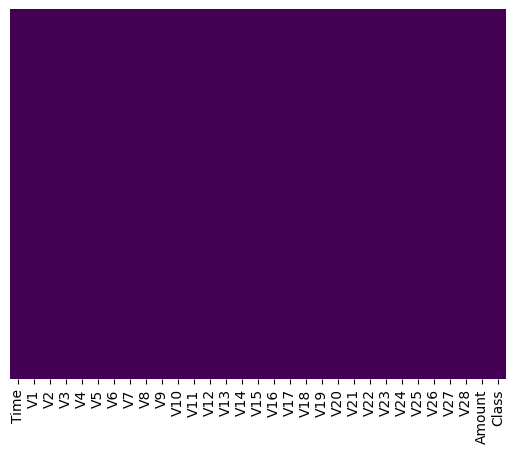

In [81]:
#visualize the nan values in heatmap
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [82]:
# Descriptive Statistics of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


| **`Exploratory Data Analysis section`**|
|----------------------------|
- Exploratory data analysis (EDA) is also crucial to understand the distributions and patterns in the data, especially given that the `V1-V28` columns are anonymized.

## **Details about fraud cases**

In [83]:
# Determine number of fraud cases in the dataset
fraud_case = df[df['Class']==1]
valid_case = df[df['Class']==0]
fraction = len(fraud_case) / len(valid_case)
fraction

0.0017304750013189597

In [84]:
# print number of fraud case
print(f"Fraud Cases: {len(fraud_case)}")

# print number of valid case
print(f"Valid Case: {len(valid_case)}")    

Fraud Cases: 492
Valid Case: 284315


In [85]:
# Percentage
percentage = len(fraud_case) / len(df['Class']) * 100
percentage

0.1727485630620034

#### **:: Only `0.17%` transections are fradulent**
- *means* Data is highly `Unbalanced`

## **Visualize fraud & valid cases by graph**

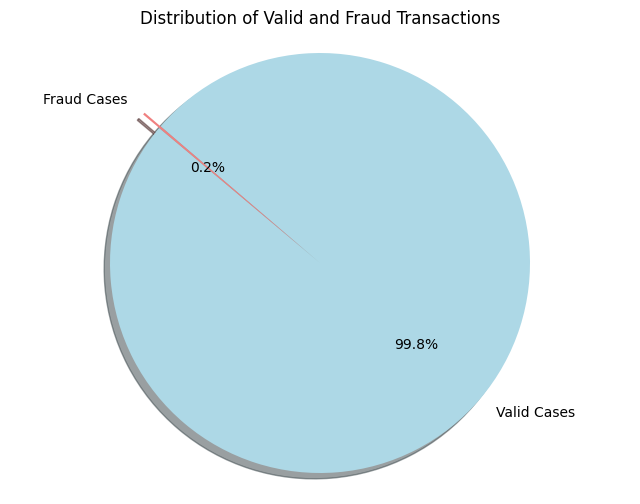

In [86]:
# Number of valid and fraud transactions
valid_cases = len(valid_case)
fraud_cases = len(fraud_case)

# Labels for the classes
labels = ['Valid Cases', 'Fraud Cases']

# Counts of each class
counts = [valid_cases, fraud_cases]

# Colors for the pie slices
colors = ['lightblue', 'lightcoral']

# Explode the Fraud Cases slice to emphasize it
explode = (0, 0.1)

# pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  
plt.title('Distribution of Valid and Fraud Transactions')
plt.show()


## **Amount of fraud transections**

In [87]:
# About fraud-case Amount
print("Details of amount for fraud transections","\n",
    fraud_case['Amount'].describe())

Details of amount for fraud transections 
 count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [88]:
# About valid-case Amount
print("Details of amount for valid transctions","\n",
      valid_case['Amount'].describe().T)

Details of amount for valid transctions 
 count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


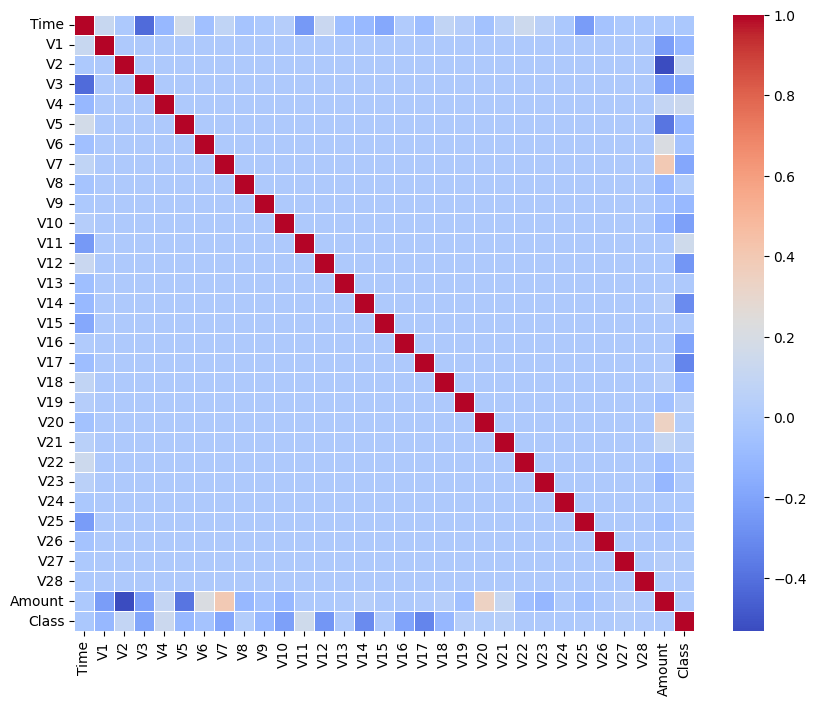

In [89]:
# Plotting the Correlation Matrix
# numerical_columns = ["Class", "Amount", "Time"]
numerical_columns = df.columns
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.show()

|**`Machine Learning section`**|
|----------------------------|

## **Developing Model**

In [90]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score,classification_report,
                            confusion_matrix)

In [91]:
# Defining X and y
X = df.drop(["Class"], axis=1)
y = df['Class']                     # target variable

# Values & shapes
print("Values of X: ",X.values,"\n", "Shape X: ", X.shape)
print("Values of y: ",y.values,"\n", "Shape y: ", y.shape)

Values of X:  [[ 0.00000000e+00 -1.35980713e+00 -7.27811733e-02 ...  1.33558377e-01
  -2.10530535e-02  1.49620000e+02]
 [ 0.00000000e+00  1.19185711e+00  2.66150712e-01 ... -8.98309914e-03
   1.47241692e-02  2.69000000e+00]
 [ 1.00000000e+00 -1.35835406e+00 -1.34016307e+00 ... -5.53527940e-02
  -5.97518406e-02  3.78660000e+02]
 ...
 [ 1.72788000e+05  1.91956501e+00 -3.01253846e-01 ...  4.45477214e-03
  -2.65608286e-02  6.78800000e+01]
 [ 1.72788000e+05 -2.40440050e-01  5.30482513e-01 ...  1.08820735e-01
   1.04532821e-01  1.00000000e+01]
 [ 1.72792000e+05 -5.33412522e-01 -1.89733337e-01 ... -2.41530880e-03
   1.36489143e-02  2.17000000e+02]] 
 Shape X:  (284807, 30)
Values of y:  [0 0 0 ... 0 0 0] 
 Shape y:  (284807,)


In [92]:
# Spliting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state= 42)

In [93]:
# build & applying Model
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred=rfc.predict(X_test)

### **Model Evaluation**

In [96]:
# Evaluating the classifier
n_outliers = len(fraud_case)
n_errors = (y_pred != y_test).sum()
print("The model used is 'RandomForestClassifier'")

# Accuracy 
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc}")

# Precision
prec = precision_score(y_test, y_pred)
print(f"Precision score: {prec}")

# Recall
rec = recall_score(y_test, y_pred)
print(f"Recall score: {rec}")

# F1
f1 = f1_score(y_test, y_pred)
print(f"f1 score: {f1}")

The model used is 'RandomForestClassifier'
Accuracy score: 0.9995786664794073
Precision score: 0.9625
Recall score: 0.7857142857142857
f1 score: 0.8651685393258427


---
## September 21, 2023